In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df_energy = pd.read_csv('./data/prepared/df_energy_climate_2020.csv')

## Analysis on the energy price and energy feeding volume

### Overview of the key figures

In [3]:
df_energy[['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].describe()

,nuclear_power,not_renewable,renewable,energy_price
count,8784.000000,8784.000000,8784.000000,8784.000000
mean,6934.673246,33765.069651,27962.757734,30.471738
std,969.007750,11153.160609,12083.398906,17.501777
min,3778.562500,12031.295000,7868.889000,-83.940000
25%,6449.072375,25596.779063,18187.097938,21.750000
50%,6793.803375,32783.599125,26601.655125,30.990000
75%,7833.245750,39941.688938,36812.760000,40.250000
max,8178.095500,68865.521000,68749.836250,200.040000


#### What does it mean when energy price reached minus?
Negative electricity prices (or very low electricity prices) occur in wholesale trading when there is a surplus of electricity. Or, in other words, when electricity generation exceeds electricity consumption. Such a situation arises, among other things, when there is a very high feed-in of very low-priced electricity from wind, as is the case at the moment.
<br />
[General information about energy price](https://www.enbw.com/energie-entdecken/energiewirtschaft-und-politik/energiewirtschaft/strommarkt.html)

### Correlation between the key figures 

In [4]:
df_energy.loc[:,['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].corr()

,nuclear_power,not_renewable,renewable,energy_price
nuclear_power,1.000000,0.407899,-0.135583,0.373059
not_renewable,0.407899,1.000000,-0.460238,0.797350
renewable,-0.135583,-0.460238,1.000000,-0.513584
energy_price,0.373059,0.797350,-0.513584,1.000000


### Conclusion
- Renewable energy has a **negative** correlation to energy price
- Not renewable energy has a **strong** correlation to energy price

## Analysis - Day of week

In [5]:
df_energy['datetime'] = pd.to_datetime(df_energy['datetime'])
df_energy['dayofweek'] = df_energy['datetime'].dt.day_of_week
grp_day_of_week = df_energy.groupby(['dayofweek'])

### Overview of energy price grouped by day of week

In [6]:
grp_day_of_week['energy_price'].describe()

,count,mean,std,min,25%,50%,75%,max
dayofweek,,,,,,,,
0,1248.0,32.391106,18.985385,-78.15,22.6125,33.365,43.2925,200.04
1,1248.0,33.767548,18.157579,-83.94,24.2775,33.000,42.4600,189.25
2,1272.0,35.137555,16.003927,-29.98,25.5375,33.785,43.2300,114.00
3,1272.0,35.097586,14.362931,-1.58,25.7650,34.040,43.1850,110.13
4,1248.0,33.382268,13.444462,-8.77,24.9200,33.595,41.2525,106.35
5,1248.0,25.210457,12.842518,-11.16,17.1250,26.260,34.0000,58.00
6,1248.0,18.136963,20.081397,-74.97,7.5700,21.445,32.0100,58.97


(0: Monday - 6: Sunday)
<br/>
- Energy price on weekend are lower than on weekdays
- Mean and median are almost the same -> the prices are more or less evenly distributed from the lowest to highest price

### Visualize prices by day of week

<AxesSubplot: xlabel='dayofweek', ylabel='energy_price'>

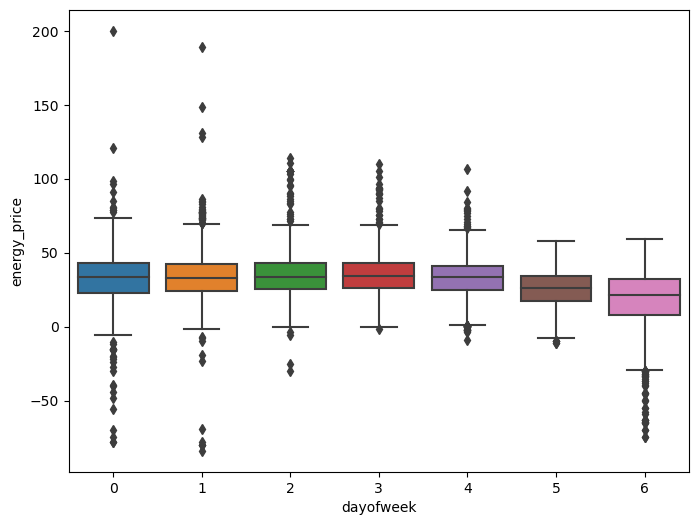

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy['dayofweek'], 
    y=df_energy['energy_price'] 
    )

- Energy price tends to decrease on weekends.
<br />
[Article about the relation between energy cost and day of week](https://www.finanztip.de/stromtarife/variable-stromtarife/)

### Day of week and energy feeding volume
This analysis was done to find out the reason of lower energy prices on weekends.

In [8]:
df_energy['total_feeding_volume'] = df_energy['renewable'] + df_energy['nuclear_power'] + df_energy['not_renewable']

In [9]:
df_energy_reshape = df_energy.melt(['datetime', 'dayofweek', 'energy_price', 'date', 'hour', 'month', 'wind_speed', 'solar_radiation', 'temperature'], var_name='type_of_power', value_name='feeding_volume')

<AxesSubplot: xlabel='type_of_power', ylabel='feeding_volume'>

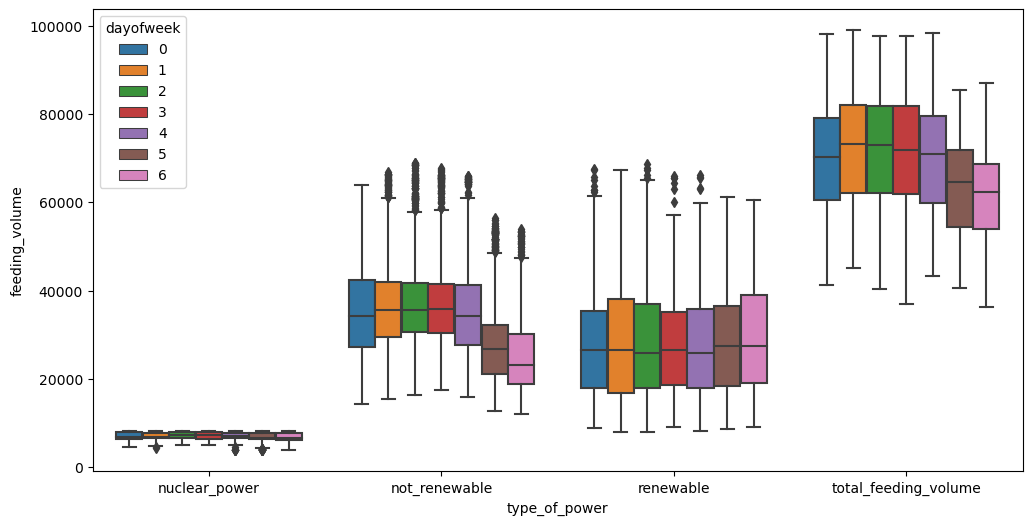

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_energy_reshape,
    x='type_of_power',
    y='feeding_volume',
    hue='dayofweek',
)

- No significant differences on feeding volume of nuclear power and renewable energy per day of week
- Feeding volume of not renewable energy is considerably less (by about 10.000 MW)

### Conclusion
- Energy price is lower on weekends as the dmand is less and thus the share of the renewable energy becomes bigger.

In [11]:
grp_hour = df_energy.groupby(['hour'])
grp_hour['energy_price'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0.0,366.0,23.080055,11.574421,-27.53,17.4400,25.055,31.6125,46.27
1.0,366.0,21.901175,11.766476,-21.99,16.5550,24.450,30.0675,45.01
2.0,366.0,21.419044,11.670960,-20.37,16.1700,24.080,29.8150,44.00
3.0,366.0,22.726038,11.696205,-24.65,18.1000,25.005,30.6050,46.35
4.0,366.0,27.135164,13.280566,-30.98,21.1150,28.495,35.4050,59.98
5.0,366.0,32.502486,15.727035,-33.58,25.0475,33.750,42.0150,76.39
6.0,366.0,36.349481,17.549747,-29.90,26.6800,37.180,46.8325,86.53
7.0,366.0,35.776530,18.056699,-39.46,24.2125,36.595,46.7625,105.46
8.0,366.0,33.123962,18.051985,-63.04,21.9050,34.270,45.1475,105.42


<AxesSubplot: xlabel='hour', ylabel='energy_price'>

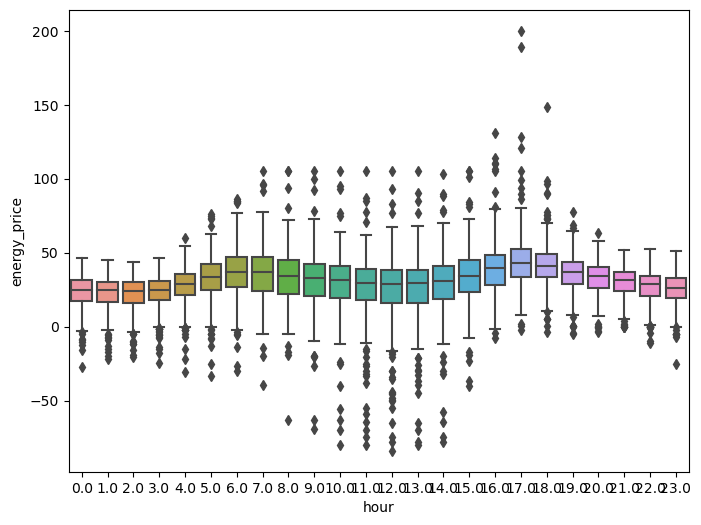

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy['hour'], 
    y=df_energy['energy_price'] 
    )

### Observation
- Energy price increases in the morning and the evening 
### Assumption
- Lower energy price during the night due to the lower demand
- Lower energy price during the day due to the severl weather factors that are active during the day

In [13]:
grp_month = df_energy.groupby(['month'])
grp_month['energy_price'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,744.0,34.978710,11.572188,-8.77,28.7800,34.450,42.9025,68.64
2.0,696.0,21.911839,16.065570,-32.14,10.4775,25.345,34.0125,59.98
3.0,744.0,22.519315,13.804866,-55.05,16.7700,24.035,31.3100,64.70
4.0,720.0,17.049194,16.637682,-83.94,12.7000,19.935,24.9200,69.68
5.0,744.0,17.604879,13.731577,-74.97,14.0075,19.200,23.2050,57.00
6.0,720.0,26.229167,10.846622,-48.17,20.1350,26.200,33.6525,60.75
7.0,744.0,30.074946,14.922887,-64.99,25.4000,31.730,38.8400,60.02
8.0,744.0,34.889704,11.558987,-16.18,28.0000,34.200,41.0000,90.00
9.0,720.0,43.678097,18.123717,-58.80,34.0075,41.500,51.0900,200.04


<AxesSubplot: xlabel='month', ylabel='energy_price'>

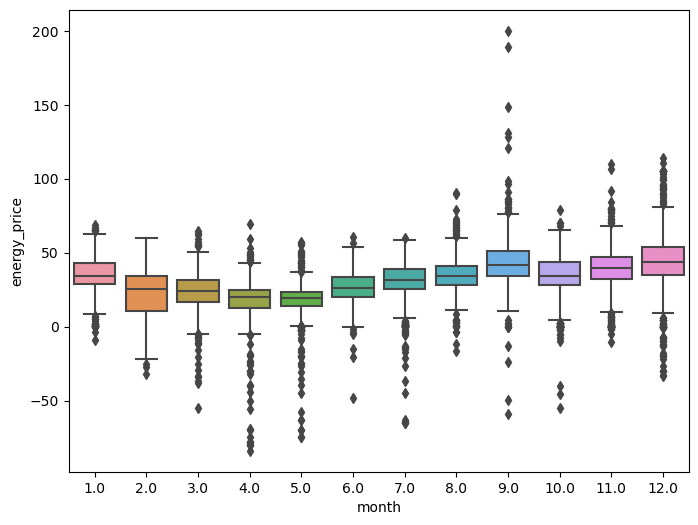

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy['month'], 
    y=df_energy['energy_price'] 
)

### Observation
- Energy price decreases in April and May
- Energy price tends to increase from June toward December
### Assumption
- Price increase from June has to do with the length of daylight
- Lower price in April / May is related to the weather behavior on those months

## Analysis - energy price and climate
### Visualize energy price and weather data

In [15]:
# resample the combined df by month
df_energy['datetime'] = pd.to_datetime(df_energy['datetime'])
df_energy_weather = df_energy.copy()
df_energy_weather.set_index('datetime', inplace=True)
df_energy_weather_per_month = df_energy_weather.resample('M').mean(numeric_only=True)
df_energy_weather_per_month.reset_index(inplace=True)

In [16]:
df_energy_weather_per_month

,datetime,wind_speed,solar_radiation,temperature,nuclear_power,not_renewable,renewable,energy_price,hour,dayofweek,month,total_feeding_volume
0,2020-01-31,4.155108,34.024194,3.297043,7807.641693,40108.081534,30550.649508,34.978710,11.5,3.000000,1.0,78466.372735
1,2020-02-29,5.970690,56.419540,5.157471,7419.751695,29840.861220,39375.945443,21.911839,11.5,3.068966,2.0,76636.558358
2,2020-03-31,4.426747,131.969086,5.187097,7266.131540,31178.614326,32605.582938,22.519315,11.5,2.935484,3.0,71050.328804
3,2020-04-30,3.495417,229.087500,10.348750,6561.627329,24050.886692,29070.825843,17.049194,11.5,2.966667,4.0,59683.339864
4,2020-05-31,3.361694,234.065860,11.843011,5762.919882,24769.446723,27092.300725,17.604879,11.5,3.193548,5.0,57624.667331
5,2020-06-30,3.197083,230.220833,16.694167,6463.409776,29899.843443,24925.065740,26.229167,11.5,2.833333,6.0,61288.318959
6,2020-07-31,3.185484,235.129032,17.724328,5687.576221,30833.884795,26203.010712,30.074946,11.5,3.000000,7.0,62724.471728
7,2020-08-31,2.995833,200.256720,19.815860,7521.303469,34069.302622,24342.192233,34.889704,11.5,3.064516,8.0,65932.798324
8,2020-09-30,2.827222,153.597222,14.820833,7349.898565,37079.136104,23241.985196,43.678097,11.5,2.900000,9.0,67671.019865
9,2020-10-31,3.853629,67.380376,10.078629,6892.146856,36540.185486,29493.414200,33.955901,11.5,3.096774,10.0,72925.746541


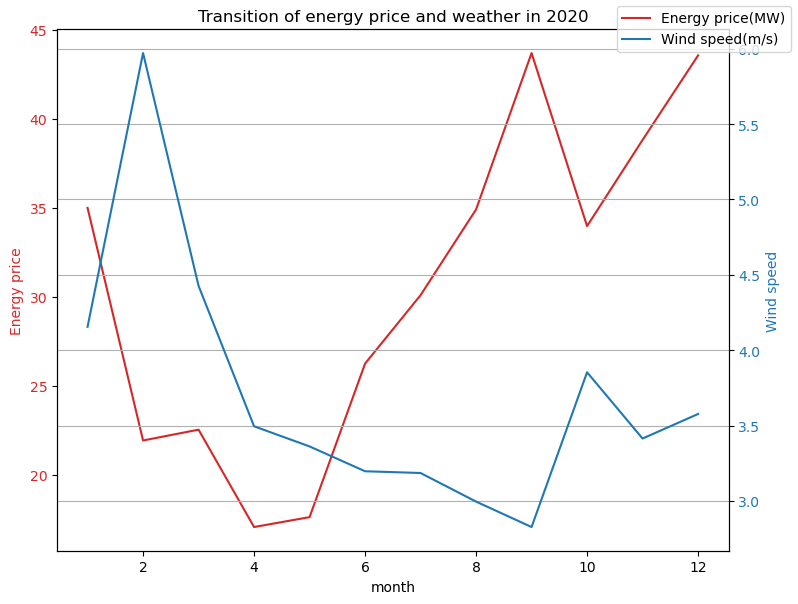

In [34]:
# plot energy price and wind speed in one graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# energy_price
color_1 = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('Energy price', color=color_1)
ax1.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['energy_price'],
    color=color_1
)

# windspeed
ax2 = ax1.twinx()
color_2 = 'tab:blue'
ax2.set_ylabel('Wind speed', color=color_2)
ax2.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['wind_speed'],
    color=color_2
)

# change label color
ax1.tick_params(axis='y', labelcolor=color_1)
ax2.tick_params(axis='y', labelcolor=color_2)

# rotate x-axis
ax2.tick_params(axis='x', rotation=45)

# adjust subplot params so that the subplots fits in to the figure area
fig.tight_layout()

plt.grid()
plt.title('Transition of energy price and weather in 2020')
fig.legend(['Energy price(MW)', 'Wind speed(m/s)'])
plt.show()

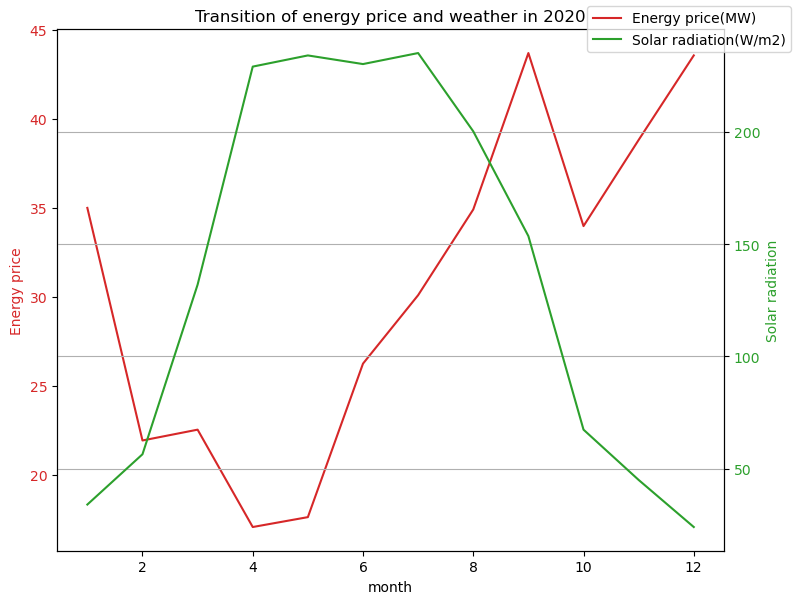

In [35]:
# plot energy price and wind speed in one graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# energy_price
color_1 = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('Energy price', color=color_1)
ax1.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['energy_price'],
    color=color_1
)


# solar radiation
ax2 = ax1.twinx()
color_2 = 'tab:green'
ax2.set_ylabel('Solar radiation', color=color_2)
ax2.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['solar_radiation'],
    color=color_2
)

# change label color
ax1.tick_params(axis='y', labelcolor=color_1)
ax2.tick_params(axis='y', labelcolor=color_2)

# rotate x-axis
ax2.tick_params(axis='x', rotation=45)

# adjust subplot params so that the subplots fits in to the figure area
fig.tight_layout()

plt.grid()
plt.title('Transition of energy price and weather in 2020')
fig.legend(['Energy price(MW)', 'Solar radiation(W/m2)'])
plt.show()

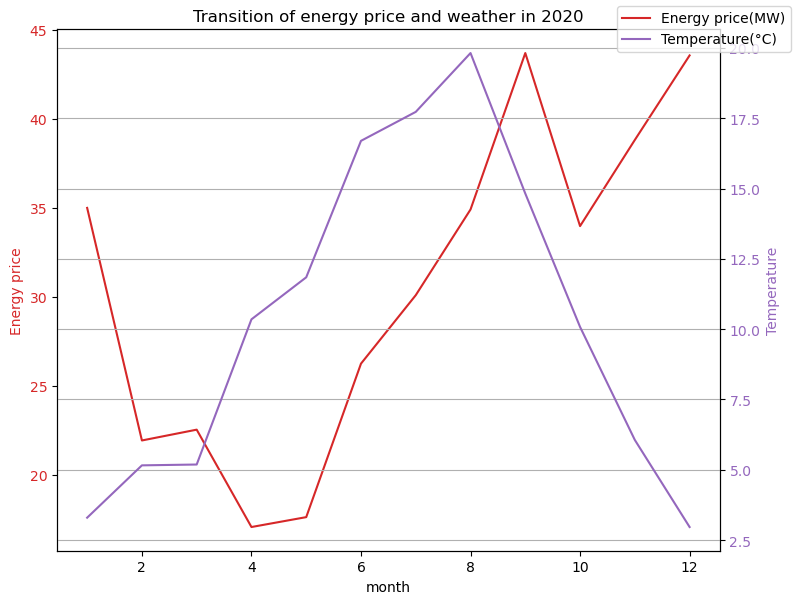

In [36]:
# plot energy price and wind speed in one graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# energy_price
color_1 = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('Energy price', color=color_1)
ax1.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['energy_price'],
    color=color_1
)

# temperature
ax2 = ax1.twinx()
color_2 = 'tab:purple'
ax2.set_ylabel('Temperature', color=color_2)
ax2.plot(
    df_energy_weather_per_month['month'],
    df_energy_weather_per_month['temperature'],
    color=color_2
)

# change label color
ax1.tick_params(axis='y', labelcolor=color_1)
ax2.tick_params(axis='y', labelcolor=color_2)

# rotate x-axis
ax2.tick_params(axis='x', rotation=45)

# adjust subplot params so that the subplots fits in to the figure area
fig.tight_layout()

plt.grid()
plt.title('Transition of energy price and weather in 2020')
fig.legend(['Energy price(MW)', 'Temperature(°C)'])
plt.show()

### Observation
- Negative correlation between energy price and wind speed or solar radiation can be seen
- The Both wind speed and solar radiation decreases in the last quarter of the year, which could explain the higher price in the period
- Figures in March and April may be handled as an irregular case, as we had the first corona lockdown which could impact the energy price.

### Correlation of energy price, energy feeding volume and climate

In [20]:
corr = df_energy[['nuclear_power', 'not_renewable', 'renewable', 'energy_price', 'wind_speed', 'solar_radiation', 'temperature']].corr()
corr

,nuclear_power,not_renewable,renewable,energy_price,wind_speed,solar_radiation,temperature
nuclear_power,1.000000,0.407899,-0.135583,0.373059,-0.050952,-0.254697,-0.319468
not_renewable,0.407899,1.000000,-0.460238,0.797350,-0.379269,-0.186633,-0.243570
renewable,-0.135583,-0.460238,1.000000,-0.513584,0.804260,0.478710,0.076419
energy_price,0.373059,0.797350,-0.513584,1.000000,-0.444114,-0.216114,-0.065411
wind_speed,-0.050952,-0.379269,0.804260,-0.444114,1.000000,0.096488,-0.109658
solar_radiation,-0.254697,-0.186633,0.478710,-0.216114,0.096488,1.000000,0.548614
temperature,-0.319468,-0.243570,0.076419,-0.065411,-0.109658,0.548614,1.000000


### Correlation in heatmap

<AxesSubplot: >

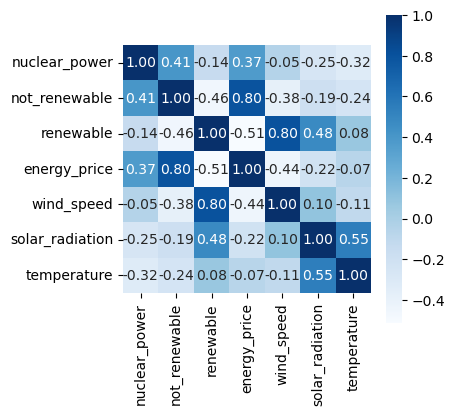

In [21]:
plt.figure(figsize=(4,4))
sns.heatmap(
    corr,
    square=True,
    cmap='Blues',
    annot=True,
    fmt='.2f'
)

### Observation
- Wind speed and renewable energy have strong correlation
- Solar radiation and temperature have substantial correlation
- Wind speed and energy price have moderate negative correlation
- Wind speed and not renewable energy have moderate correlation
- Solar radiation and renewable energy have moderate correlation
- Temperature and nuclear power have low correlation

### Conclusion
- Wether factors seems to play a big part in the energy price

## Time series analysis
### Autocorrelation

In [22]:
plt.rcParams['figure.figsize'] = (10, 5)

### Autocorrelation - energy price

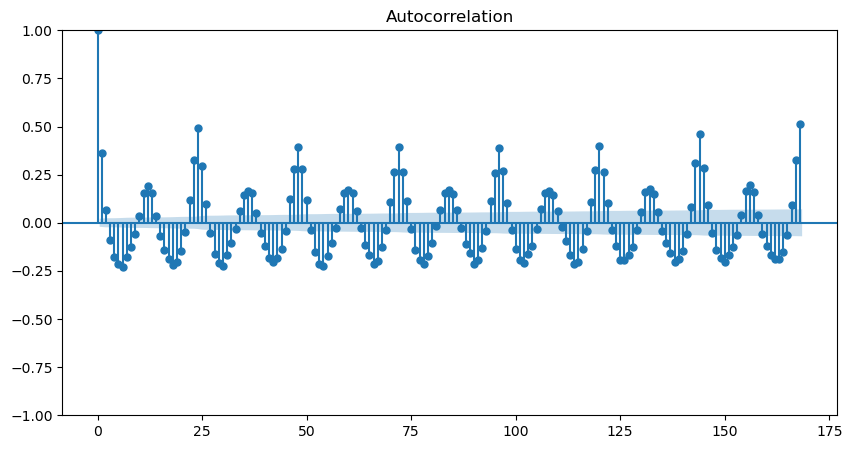

In [23]:
# behavior in one week
diff_week = plot_acf(df_energy["energy_price"].diff().dropna(), lags=168)

- Fairly regular seasonality can be seen
- There is relatively strong autocorrelation with lag of one hour and 24 hours
- With lag of 6 hours, the autocorrelation hits its bottom
- From lag of 10 hours, the autocorrelation tends to increase and has its peak with lag of 12 hours

### Autocorrelation - wind

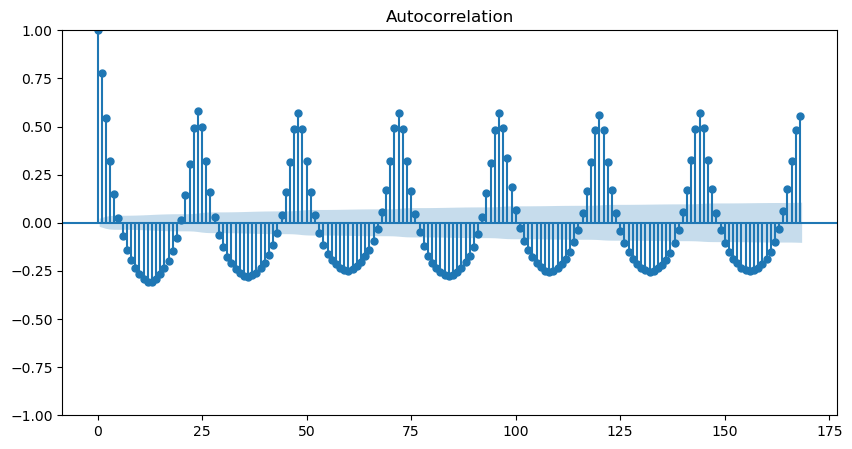

In [24]:
# behavior in one week
diff_week_wind = plot_acf(df_energy["wind_speed"].diff().dropna(), lags=168)

- Fairly regular seasonality can be seen
- There is relatively strong autocorrelation with lag of one hour and 24 hours
- With lag of 12 hours, the autocorrelation hits its bottom

### Autocorrelation - solar radiation

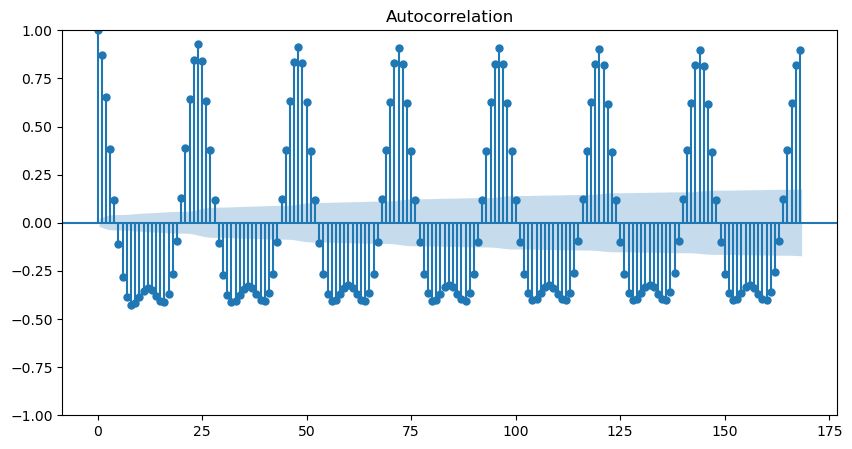

In [25]:
diff_week = plot_acf(df_energy["solar_radiation"].diff().dropna(), lags=168)

- Fairly regular seasonality can be seen
- There is relatively strong autocorrelation with lag of one hour and 24 hours
- With the lag of 8, the autocorrelation hits once its bottom and increase till the lag of 12 hours. After that, the autocorrelation decreases again till the lag of 16 hours

### Autocorrelation - temperature

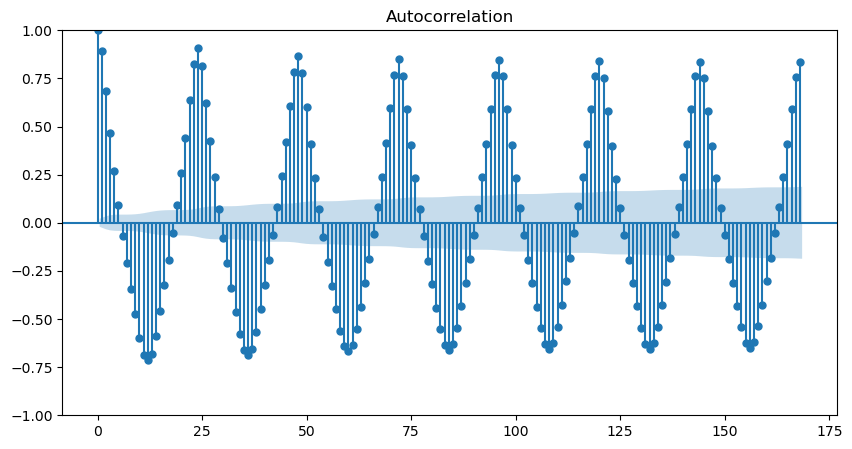

In [26]:
diff_week = plot_acf(df_energy["temperature"].diff().dropna(), lags=168)

### Autocorrelation - renewable energy feeding volume

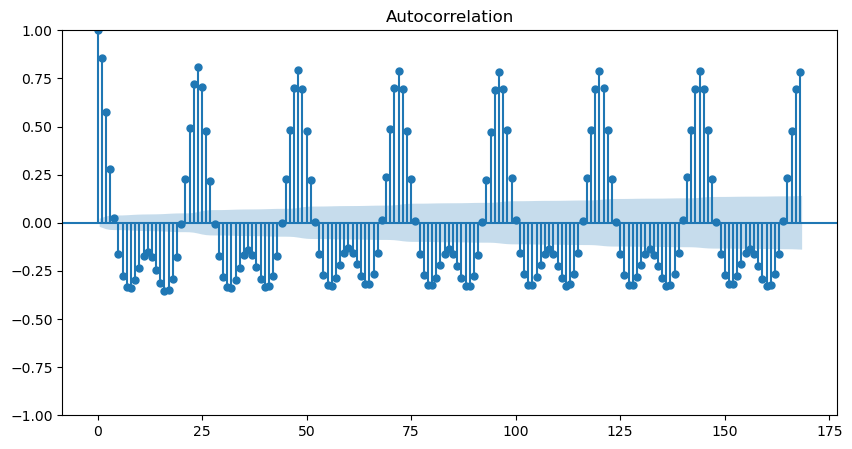

In [27]:
diff_week_renewable = plot_acf(df_energy["renewable"].diff().dropna(), lags=168)

- Fairly regular seasonality can be seen
- Synchronized behavior with solar radition

### Autocorrelation - not renewable energy feeding volume

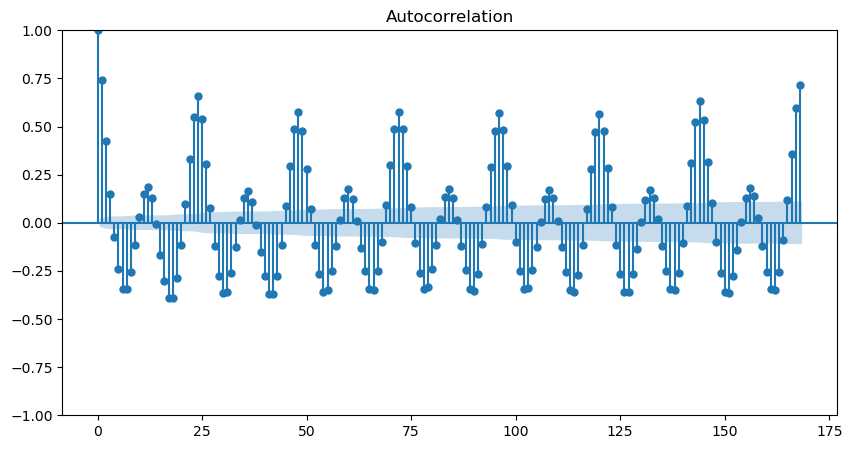

In [28]:
diff_week = plot_acf(df_energy["not_renewable"].diff().dropna(), lags=168)


### Autocorrelation - nuclear power feeding volume

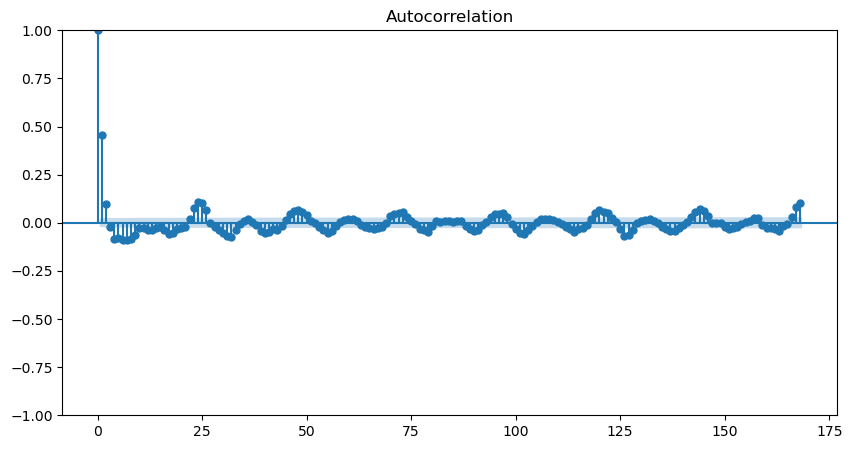

In [29]:
diff_week = plot_acf(df_energy["nuclear_power"].diff().dropna(), lags=168)


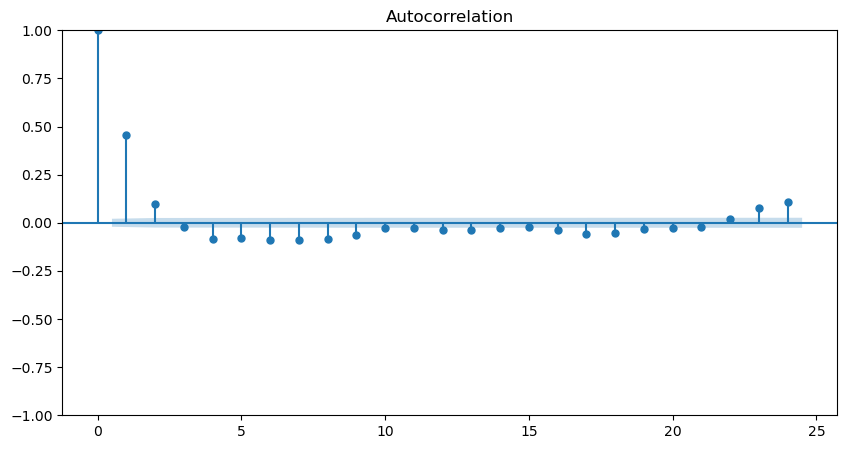

In [30]:
diff_day = plot_acf(df_energy["nuclear_power"].diff().dropna(), lags=24)

### Conclusion
- The autocorrelation of energy feeding volume and weather have fairly regular seasonality except for nuclear power feeding volume
- The seasonality looks like below:
    - All items have strong autocorrelation with lag of 24 hours
    - The autocorrelation of energy price, wind speed, temperature and not renewable feeding volume hits its bottom with lag of 12 hours, shaping an inverted triagle
    - Autocorrelation of solar radiation and renewable energy reach its bottom twice a day, with lag of 8 and 16 hours

## Conclusion after all analysis

#### Below figures play an important roll in defining the energy price:
- Month
- Day of week
- Hours
- Energy feeding volume
- Weather, especially wind speed and solar radiation

#### Below figures have regular seasonality in their autocorrelation:
- Energy price
- Renewable energy feeding volume
- Not renewable energy feeding volume
- Wind speed
- Solar radiation
- Temperature

## From above observation, we conclude to
#### Set below figures as future covariates
    - Month
    - Day of week
    - Hours

#### Set below figures as past covariates with lags of one week, one day and one hour
    - Energy price
    - Renewable energy feeding volume
    - Not renewable energy feeding volume
    - Nuclear energy feeding volume
    - Wind speed
    - Solar radiation
    - (Temperature) -- SHOULD WE REMOVE TEMPERATURE??
